# Exploration of the Ford GoBike System Data
## by Zhikun Lu

## Investigation Overview

This presentation aims to explore the following topics:
1. What is the demand pattern across time for bike rides?
2. What is the impact of COVID 19 on bike rides?

## Dataset Overview

This dataset is from Lyft Bay Wheel. (source: https://www.lyft.com/bikes/bay-wheels/system-data) 

It includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('./data/clean.csv')
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time']   = pd.to_datetime(df.end_time)
df['duration'] = (df.end_time - df.start_time).dt.total_seconds()/60
df = df.query('duration > 1.2')
df = df.query('duration < 120')
df['hour']  = df.start_time.dt.hour
df['day']   = df.start_time.dt.weekday
df['month'] = df.start_time.dt.month

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Daily Riding Pattern

- More trips occur during 7-9am and 4-6pm, i.e. the morning peak and the evening peak. 
- Subscribers ride more often during rish hours than Customers.

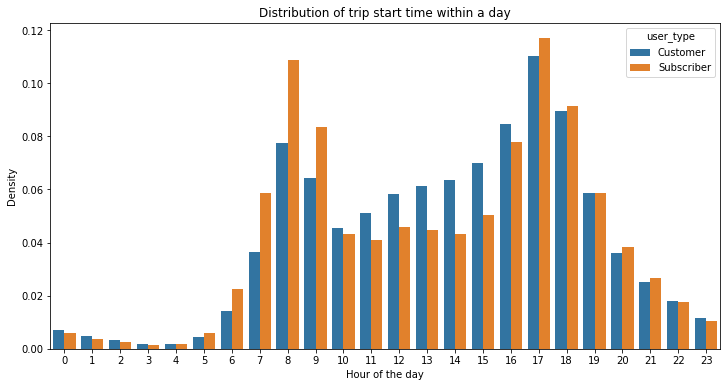

In [3]:
by_hour = df.groupby(['user_type'])['hour'].value_counts(normalize=True).rename('percentage').reset_index()
by_hour.head()
plt.figure(figsize=(12,6))
sb.barplot(x="hour", y='percentage', hue='user_type', data=by_hour)
plt.ylabel('Density')
plt.xlabel('Hour of the day')
plt.title('Distribution of trip start time within a day');

## Weekly Riding Pattern

- There are more trips on weekdays than on weekends.
- The above finding is mostly driven by subscribers:<br>
  Subscribers ride more on weekdays and less on weekends, while customers have a more flat pattern.

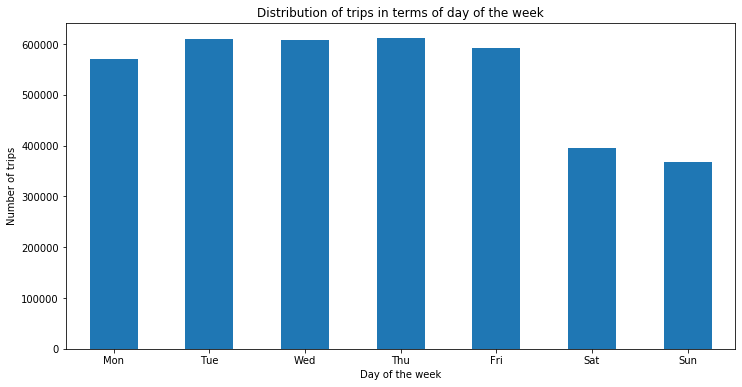

In [4]:
plt.figure(figsize=(12,6))
df.start_time.dt.weekday.value_counts().sort_index().plot(kind='bar')
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
plt.ylabel('Number of trips')
plt.xlabel('Day of the week')
plt.title('Distribution of trips in terms of day of the week');

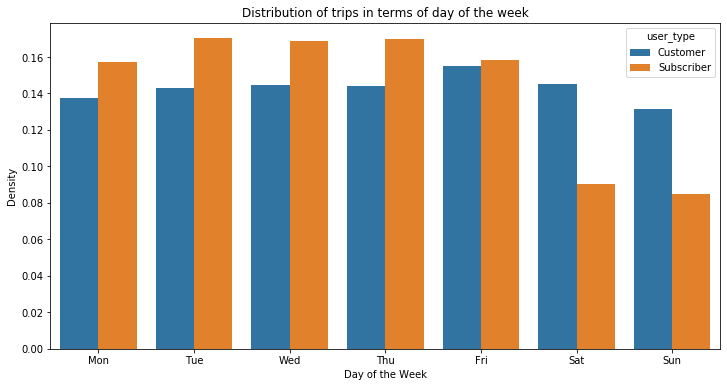

In [5]:
by_day = df.groupby(['user_type'])['day'].value_counts(normalize=True).rename('percentage').reset_index()
plt.figure(figsize=(12,6))
sb.barplot(x="day", y='percentage', hue='user_type', data=by_day)
plt.title('Distribution of trips in terms of day of the week')
plt.ylabel('Density')
plt.xlabel('Day of the Week')
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0);

## The Impact of COVID 19

Covid 19 has a huge impact on the bike-sharing business.

- The weekly number of rides dropped by 80% in March.
- Average riding time almost doubled after the Covid 19 outbreak.


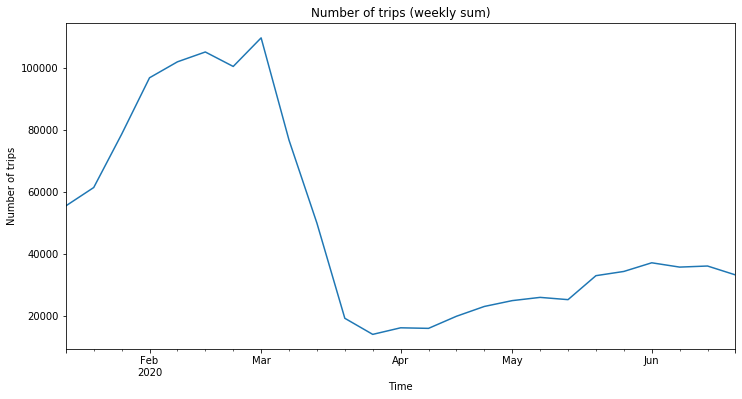

In [9]:
df['week'] = pd.PeriodIndex(df.start_time, freq='w')
trips_by_week = df.query('start_time>"2019-12-31"').groupby('week')['start_time'].count()
plt.figure(figsize=(12,6))
trips_by_week[1:-1].plot()
plt.ylabel('Number of trips')
plt.xlabel('Time')
plt.title('Number of trips (weekly sum)');

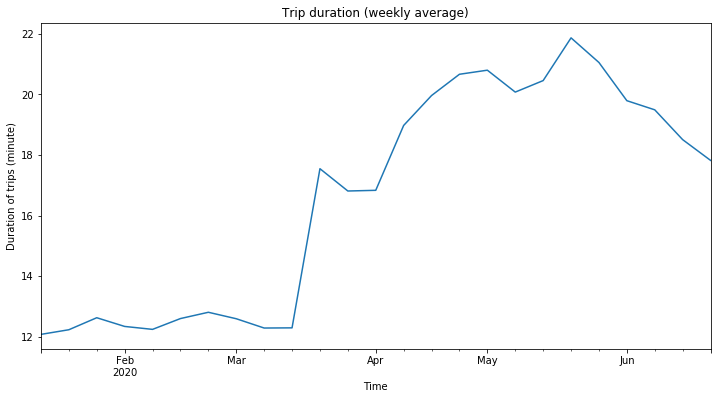

In [8]:
duration_by_week = df.query('start_time>"2019-12-31"').groupby('week')['duration'].mean()
plt.figure(figsize=(12,6))
duration_by_week[1:-1].plot()
plt.ylabel('Duration of trips (minute)')
plt.xlabel('Time')
plt.title('Trip duration (weekly average)');